#### <h1 style='text-align:center'> Seaborn for Data Visualizatoin </h1> ####

Seaborn is a data visualization library build on top of Matplotlib. Advantages of using seaborn is producing attractive visualizations and it works easilty with Pandas. Seaborn makes assumptions when creating plots. 

*This notebook is based on a tutorial by Derek Banas*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [4]:
crash_df = sns.load_dataset('car_crashes')

In [7]:
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


#### Distribution Plot ####

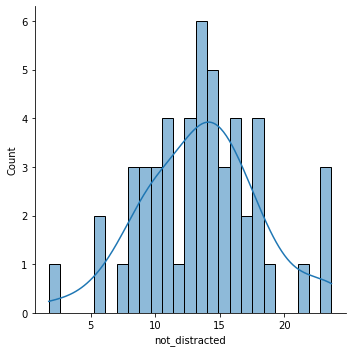

In [14]:
sns.displot(crash_df['not_distracted'], kde=True, bins=25)

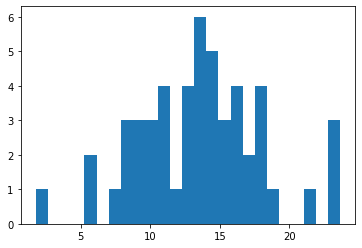

In [23]:
plt.hist(crash_df['not_distracted'], bins =25);

#### Joint Plot #### 

In [27]:
print(crash_df[['speeding', 'alcohol']].isna().sum())

speeding    0
alcohol     0
dtype: int64


TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

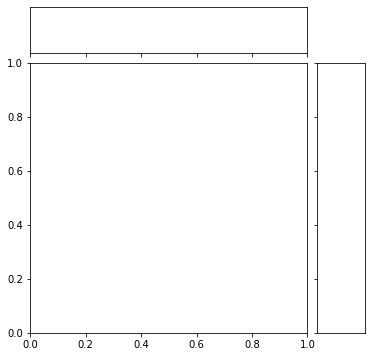

In [33]:

# Jointplot compares 2 distributions and plots a scatter plot by default
# As we can see as people tend to speed they also tend to drink & drive
# With kind you can create a regression line with kind='reg'
# You can create a 2D KDE with kind='kde'
# Kernal Density Estimation estimates the distribution of data
# You can create a hexagon distribution with kind='hex'
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg' )
# kind = 'kde', or kind= 'hex'
#sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

#### KDE Plot####
Kernal density estimation: estimates distribution of data

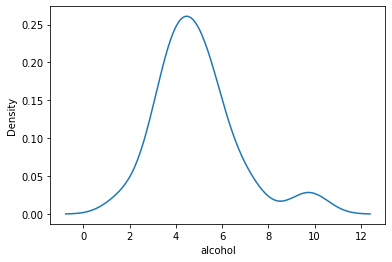

In [36]:
sns.kdeplot(crash_df['alcohol'])

#### Pair Plots ####
Plot relationships across the entire data frames numberical values  

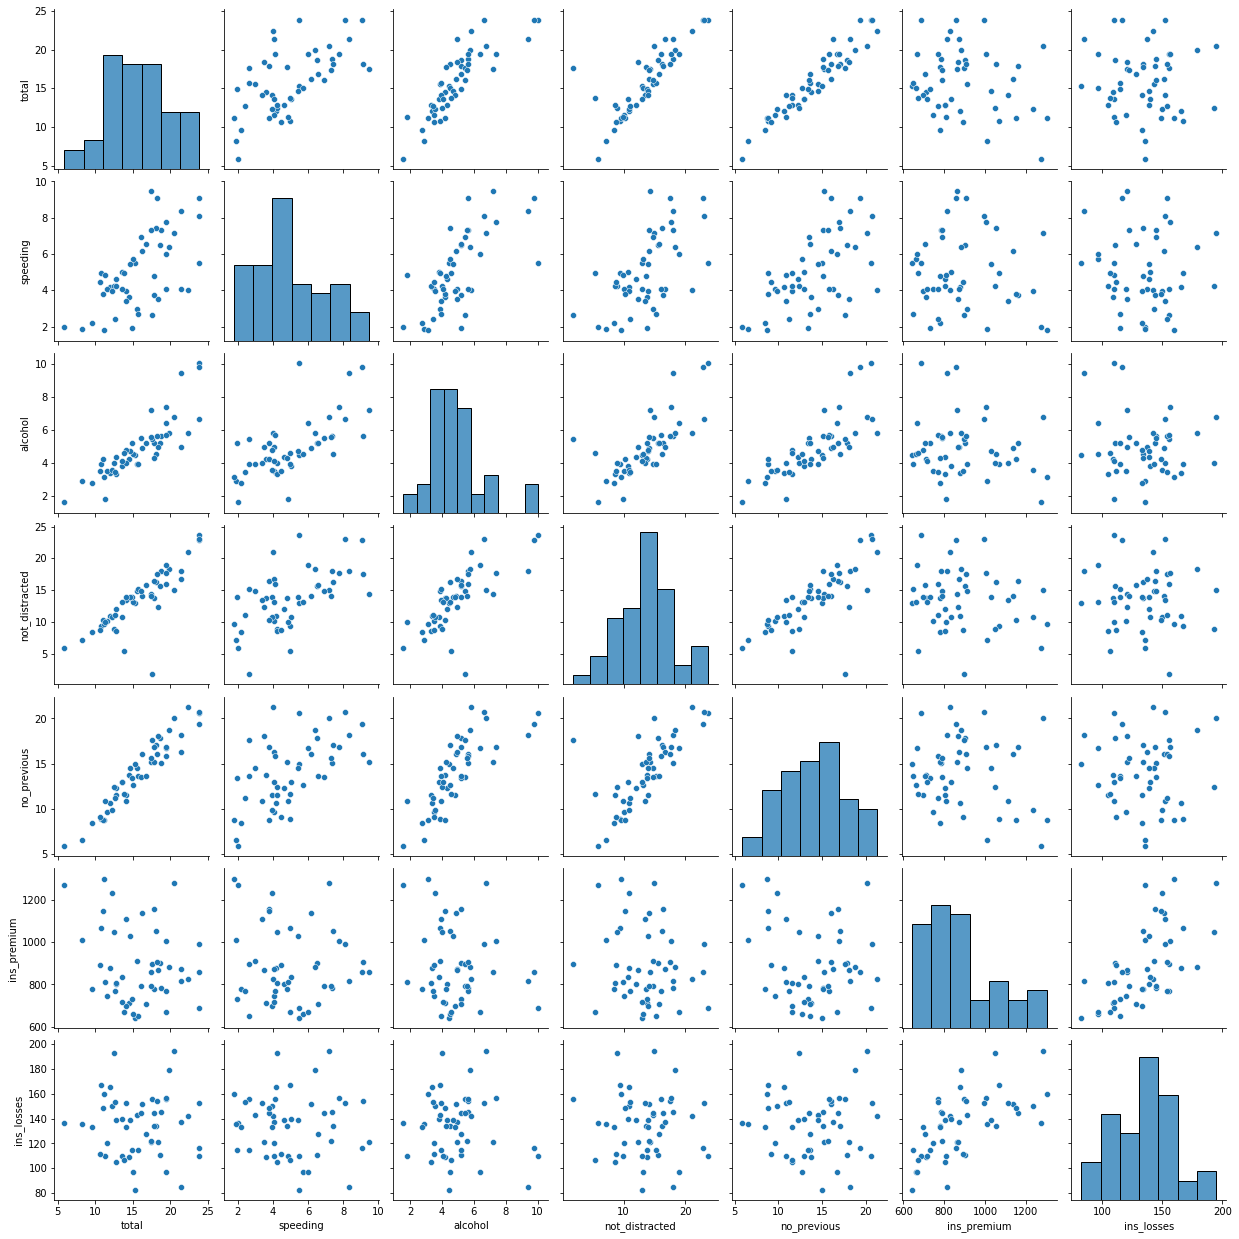

In [37]:
sns.pairplot(crash_df)

In [38]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


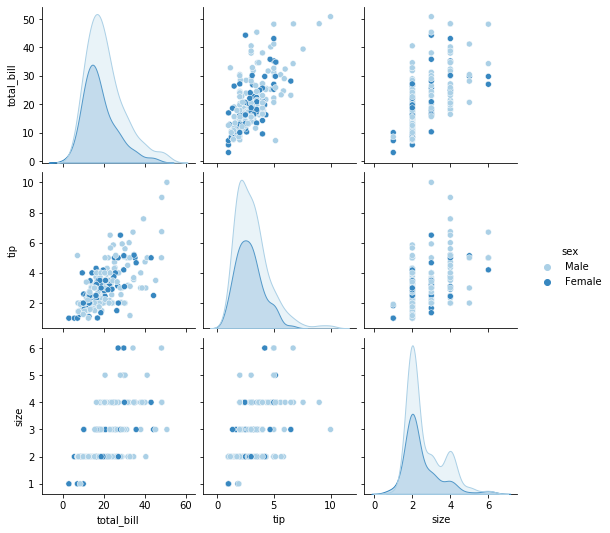

In [40]:
sns.pairplot(tips_df, hue='sex', palette='Blues')

#### Rug Plot ####

-Plots a single column of datapoints in an array as sticks on an axis  

-With a rug plot you'll see a more dense number of lines where the amount is most common.   

-This is like how a histogram is taller where values are more common.


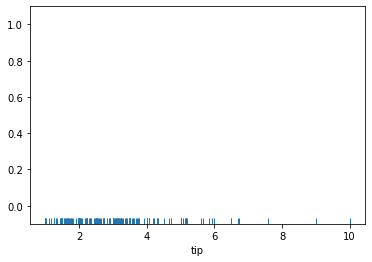

In [41]:
sns.rugplot(tips_df['tip'])

#### Stying ####


TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

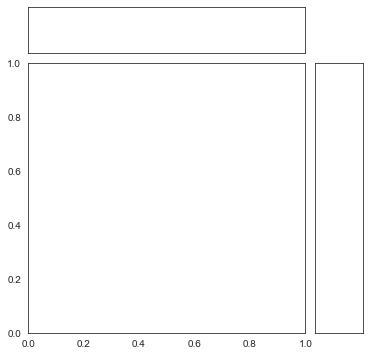

In [43]:
sns.set_style('white')
# other style whitegrid,darkgrid,  dark, ticks, 
plt.figure(figsize=(8,4))
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

In [ ]:
sns.set_context('paper', font_scale=1.4 )
# poster, "talk" for presentation, paper 

In [ ]:
sns.despint(left=False) # show axis; true takes it away
#can do 'right', 'top', 'bottom'

**Categorical Plots**

##### Bar Plots #### 

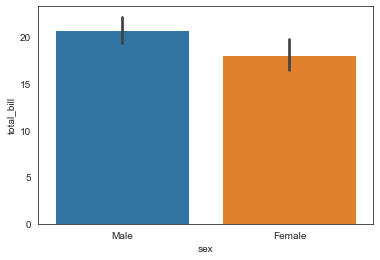

In [44]:
sns.barplot(x='sex', y='total_bill', data=tips_df)

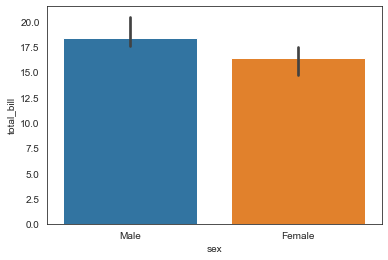

In [45]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)

**Count Plot**

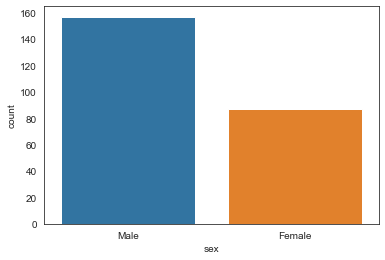

In [47]:

# A count plot is like a bar plot, but the estimator is counting 
# the number of occurances
sns.countplot(x='sex',data=tips_df)

**Box Plot**

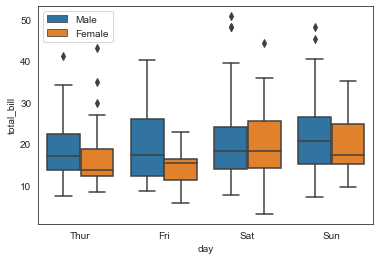

In [49]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')
plt.legend(loc=0)

#### Violin Plot ####
A combination of boxplot and KDE (kernal density estimator)

Box plot corresponds to data points, viollin plot uses KDE of data points

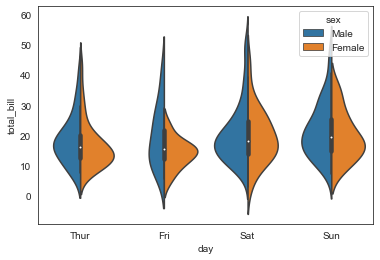

In [52]:
sns.violinplot( x='day', y='total_bill', data=tips_df, hue='sex', split=True)

**Strip Plot**

- The strip plot draws a scatter plot representing all data points where one   

- variable is categorical. It is often used to show all observations with  

- a box plot that represents the average distribution  

- Jitter spreads data points out so that they aren't stacked on top of each other  

- Hue breaks data into men and women  

- Dodge separates the men and women data

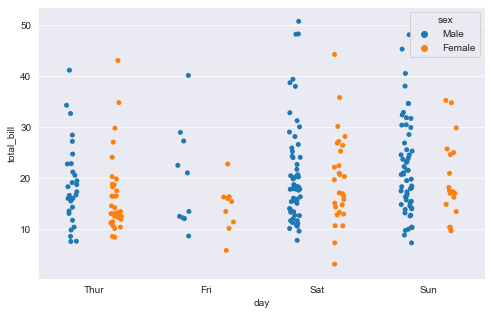

In [58]:
plt.figure(figsize=(8,5))

sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True)


**Swarm Plot** 

- A swarm plot is like a strip plot, but points are adjusted so they don't overlap  

- It looks like a combination of the violin and strip plots  

- You can stack a violin plot with a swarm

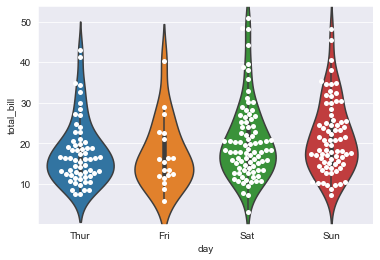

In [59]:
sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='white')

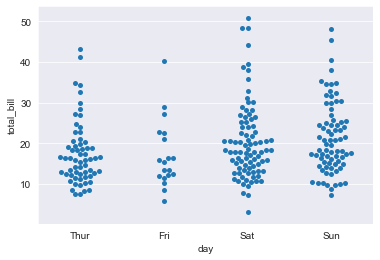

In [60]:
sns.swarmplot(x='day', y='total_bill', data=tips_df)

**Palettes**

viridis  
plasma  
infemo    
magma  
cividis  

for more: You can use Matplotlibs color maps for color styling
https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html

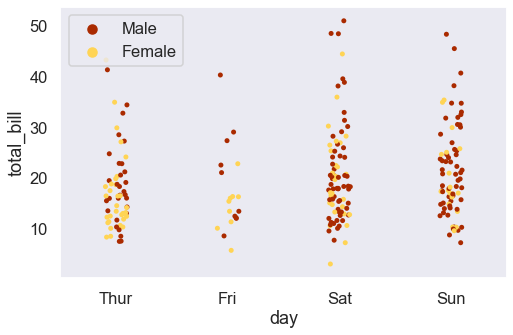

In [67]:
plt.figure(figsize=(8,5))
sns.set_style('dark') # can change to 'white'
sns.set_context('talk') #font size
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='afmhot')
plt.legend(loc=0)
# Add the optional legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,

**Matrix Plot**

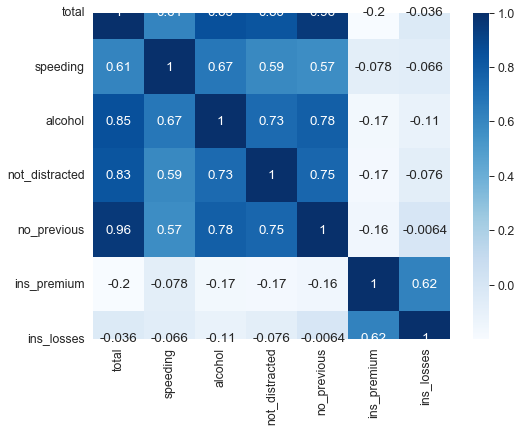

In [68]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

crash_mx = crash_df.corr()
sns.heatmap(crash_mx, annot=True, cmap='Blues')

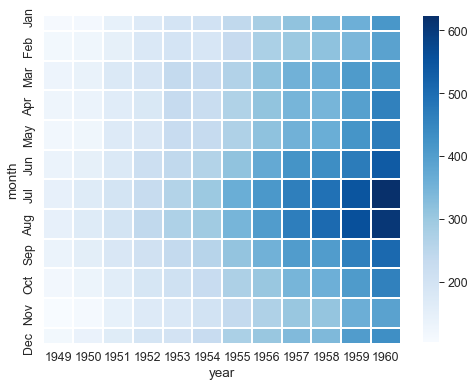

In [69]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

flights = sns.load_dataset("flights")
flights = flights.pivot_table(index='month', columns='year', values='passengers')
# You can separate data with lines
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1)


**Cluster Map**

<Figure size 576x432 with 0 Axes>

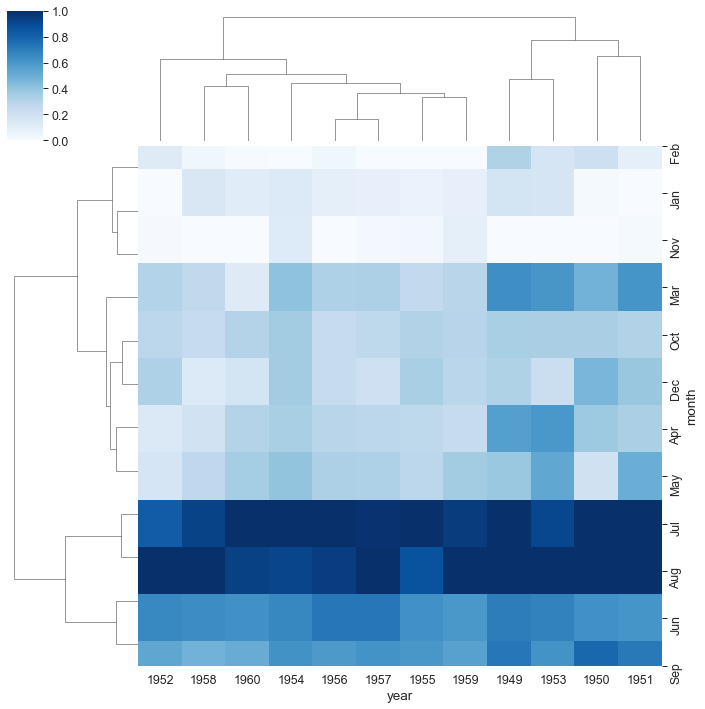

In [70]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# A Cluster map is a hierarchically clustered heatmap
# The distance between points is calculated, the closest are joined, and this
# continues for the next closest (It compares columns / rows of the heatmap)
# This is data on iris flowers with data on petal lengths
iris = sns.load_dataset("iris")
# Return values for species
# species = iris.pop("species")
# sns.clustermap(iris)

# With our flights data we can see that years have been reoriented to place
# like data closer together
# You can see clusters of data for July & August for the years 59 & 60
# standard_scale normalizes the data to focus on the clustering
sns.clustermap(flights,cmap="Blues", standard_scale=1)

**PairGrid**

<Figure size 576x432 with 0 Axes>

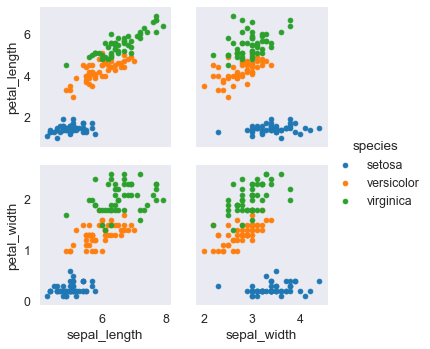

In [71]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# You can create a grid of different plots with complete control over what is displayed
# Create the empty grid system using the provided data
# Colorize based on species
# iris_g = sns.PairGrid(iris, hue="species")

# Put a scatter plot across the upper, lower and diagonal
# iris_g.map(plt.scatter)

# Put a histogram on the diagonal 
# iris_g.map_diag(plt.hist)
# And a scatter plot every place else 
# iris_g.map_offdiag(plt.scatter)

# Have different plots in upper, lower and diagonal
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

# You can define define variables for x & y for a custom grid
iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plt.scatter)

# Add a legend last
iris_g.add_legend()